In [31]:
import numpy as np
# Pandas for data manipulation
import pandas as pd
# matplotlib for data visualization
import matplotlib.pyplot as plt

# Set seed so we get same random allocation on each run of code
np.random.seed(2018)

# Load the IMDB data
sim_data = pd.read_csv("/home/hasan/files/simdatawdT.csv")

# Show structure of data set
sim_data.head()
sim_data=sim_data.iloc[:,1:]

In [32]:
sim_data.head()

,Adhesive,Brick,Cardboard,Ceramic,Cloth,Concrete,Cotton,Diamond,Glass,Leather,...,Metal,Paper,Plastic,Porcelain,Rubber,Stone,Styrofoam,Wax,Wood,Wool
0,7.0,1.2,1.2,1.2,1.8,1.0,1.8,1.0,1.0,1.4,...,1.4,1.2,2.4,1.0,3.0,1.0,2.0,2.2,1.0,1.4
1,1.6,7.0,1.6,3.0,1.0,5.8,1.4,2.8,1.4,1.4,...,1.6,1.0,1.6,3.0,1.2,4.6,1.8,1.2,1.4,1.0
2,2.2,1.0,7.0,1.2,2.8,1.0,2.8,1.2,1.0,1.6,...,1.6,6.0,2.0,1.6,1.4,1.2,3.2,2.0,3.6,1.2
3,1.4,3.0,2.0,7.0,1.0,3.2,1.0,1.8,4.0,1.6,...,1.8,1.0,2.0,5.2,1.0,2.2,1.0,1.0,2.2,1.6
4,1.6,1.0,2.4,1.2,7.0,1.0,4.6,1.2,1.0,5.0,...,1.0,3.4,1.0,1.2,3.0,1.0,1.8,1.2,2.4,5.8


In [33]:
sim_data["Adhesive"]=(sim_data["Adhesive"]-np.mean(sim_data["Adhesive"]))/np.std(sim_data["Adhesive"])
sim_data["Brick"]=(sim_data["Brick"]-np.mean(sim_data["Brick"]))/np.std(sim_data["Brick"])
sim_data["Cardboard"]=(sim_data["Cardboard"]-np.mean(sim_data["Cardboard"]))/np.std(sim_data["Cardboard"])
sim_data["Ceramic"]=(sim_data["Ceramic"]-np.mean(sim_data["Ceramic"]))/np.std(sim_data["Ceramic"])
sim_data["Cloth"]=(sim_data["Cloth"]-np.mean(sim_data["Cloth"]))/np.std(sim_data["Cloth"])
sim_data["Concrete"]=(sim_data["Concrete"]-np.mean(sim_data["Concrete"]))/np.std(sim_data["Concrete"])
sim_data["Cotton"]=(sim_data["Cotton"]-np.mean(sim_data["Cotton"]))/np.std(sim_data["Cotton"])
sim_data["Diamond"]=(sim_data["Diamond"]-np.mean(sim_data["Diamond"]))/np.std(sim_data["Diamond"])
sim_data["Glass"]=(sim_data["Glass"]-np.mean(sim_data["Glass"]))/np.std(sim_data["Glass"])
sim_data["Leather"]=(sim_data["Leather"]-np.mean(sim_data["Leather"]))/np.std(sim_data["Leather"])
sim_data["Marble"]=(sim_data["Marble"]-np.mean(sim_data["Marble"]))/np.std(sim_data["Marble"])
sim_data["Metal"]=(sim_data["Metal"]-np.mean(sim_data["Metal"]))/np.std(sim_data["Metal"])
sim_data["Paper"]=(sim_data["Paper"]-np.mean(sim_data["Paper"]))/np.std(sim_data["Paper"])
sim_data["Plastic"]=(sim_data["Plastic"]-np.mean(sim_data["Plastic"]))/np.std(sim_data["Plastic"])
sim_data["Porcelain"]=(sim_data["Porcelain"]-np.mean(sim_data["Porcelain"]))/np.std(sim_data["Porcelain"])
sim_data["Rubber"]=(sim_data["Rubber"]-np.mean(sim_data["Rubber"]))/np.std(sim_data["Rubber"])
sim_data["Stone"]=(sim_data["Stone"]-np.mean(sim_data["Stone"]))/np.std(sim_data["Stone"])
sim_data["Styrofoam"]=(sim_data["Styrofoam"]-np.mean(sim_data["Styrofoam"]))/np.std(sim_data["Styrofoam"])
sim_data["Wax"]=(sim_data["Wax"]-np.mean(sim_data["Wax"]))/np.std(sim_data["Wax"])
sim_data["Wood"]=(sim_data["Wood"]-np.mean(sim_data["Wood"]))/np.std(sim_data["Wood"])
sim_data["Wool"]=(sim_data["Wool"]-np.mean(sim_data["Wool"]))/np.std(sim_data["Wool"])


In [34]:
# Initialize total number of itterations (remember n = 5550)
total_itter = 100*len(sim_data.index)

# Initialize number of output nodes
nodes_num = 3

# Dimension of input data
input_dim = len(sim_data.columns)

# Initialize parameters for learning rate 
learn_init = 0.1

# Step 1: Initialize the weight vectors 
# Randomly generated matrix with entries between [-2,2], each column is a weight vector 
Weight_mat = 4*np.random.rand(input_dim,nodes_num)-2

# Show initialized weight matrix
print("Initialized weight matrix,"), Weight_mat

# Start SOM algorithm itterations
for itter in range(total_itter):
    
    # Initialize distance from weight to chosen point (will be updated in inner loop)
    dist_bmu = float("inf")
    
    # Step 2: Choose data point at random from input data
    
    # Select row index at random
    row_index = np.random.randint(len(sim_data.index))
    
    # Get corresponding data vector
    data_chosen = sim_data.loc[[row_index]]
    
    # Step 3: Find the weight vector that is closest to chosen point
    for node in range(nodes_num):
        
        # Compute euclidean distance from weight vector to chosen point
        dist_neuron = np.linalg.norm(data_chosen-Weight_mat[:,node])
        
        # Save the node with shortest distance of its neuron to chose point
        if dist_neuron < dist_bmu:
            
            # Update distance from weight to chosen point
            dist_bmu = dist_neuron
            
            # Best matching unit (BMU)
            weight_bmu = Weight_mat[:,node]
            index_bmu = node
    
    # Define learning rate
    learn_rate = learn_init*np.exp(-itter/total_itter)
    
    # Step 5: Update weight vectors (w_{t+1} = w_{t} + L(t)*(x_{i} - w_{t}))
    Weight_mat[:,index_bmu] = np.add(weight_bmu,learn_rate*(np.subtract(data_chosen,weight_bmu)))

# Show trained weights
print("Trained weights from SOM,"), Weight_mat

Initialized weight matrix,
Trained weights from SOM,


(None, array([[ 0.41130776, -0.35820895, -0.54832045],
        [-0.61782107,  1.13188256, -0.72012077],
        [ 1.20096272, -0.48156988, -0.3833965 ],
        [-0.50986882,  0.81445254, -0.72685221],
        [-0.04476411, -0.65767359,  1.70435223],
        [-0.59483757,  1.05372554, -0.74918631],
        [-0.0232777 , -0.64409844,  1.8322541 ],
        [-0.56224253,  0.61649635, -0.61362801],
        [-0.47253487,  0.55031051, -0.66491687],
        [-0.15547565, -0.53313114,  1.47894866],
        [-0.74502935,  1.02628728, -0.62831444],
        [-0.38992728,  0.38686997, -0.62920453],
        [ 1.12511405, -0.66904057,  0.06133711],
        [ 0.59745579, -0.33240576, -0.57687243],
        [-0.55370528,  0.77567213, -0.6787807 ],
        [ 0.41616376, -0.60858935, -0.09925902],
        [-0.65943953,  1.06553249, -0.66306803],
        [ 0.5995369 , -0.47646777, -0.04188328],
        [ 0.72948499, -0.49322013, -0.1641044 ],
        [ 0.57430841, -0.23790226, -0.39604702],
        [-0.35

In [35]:
# Initialize vector the classifies each student into group 1,2,3
group = np.zeros(len(sim_data.index))
    
# Classify input data
for index, data in sim_data.iterrows():
    
    # Initialize distance from cluster centroid
    dist_cluster = float("inf")
    
    # Find closest weight centroid
    for centroid in range(nodes_num):
        
        # Compute euclidean distance from centroid vector to data point
        dist_centroid = np.linalg.norm(data-Weight_mat[:,centroid])

        # Save centroid that is closest to data piont
        if dist_centroid < dist_cluster:

                # Update distance from weight to chosen point
                dist_cluster = dist_centroid

                # Best matching unit (BMU)
                group[index] = centroid+1
            
# Add group classifier column 
sim_data["group"] = group

# See labeled data (last column contains labels)
sim_data.head()

,Adhesive,Brick,Cardboard,Ceramic,Cloth,Concrete,Cotton,Diamond,Glass,Leather,...,Paper,Plastic,Porcelain,Rubber,Stone,Styrofoam,Wax,Wood,Wool,group
0,3.870661,-0.650682,-0.723684,-0.628286,-0.273075,-0.834310,-0.263829,-0.763888,-0.703023,-0.441001,...,-0.578899,0.171166,-0.766803,0.706782,-0.825948,-0.117331,0.215130,-0.727013,-0.480055,1.0
1,-0.246909,3.123274,-0.449858,0.461128,-0.771734,2.085774,-0.521521,0.491545,-0.434596,-0.441001,...,-0.702949,-0.453962,0.462423,-0.642529,1.255441,-0.281594,-0.591608,-0.430561,-0.720082,2.0
2,0.210599,-0.780818,3.246798,-0.628286,0.350249,-0.834310,0.380404,-0.624395,-0.703023,-0.300682,...,2.398298,-0.141398,-0.398035,-0.492606,-0.710315,0.868248,0.053783,1.199924,-0.600069,1.0
3,-0.399412,0.520546,-0.176031,2.882048,-0.771734,0.504062,-0.779214,-0.205918,1.310178,-0.300682,...,-0.702949,-0.141398,1.814573,-0.792453,-0.132152,-0.938647,-0.752956,0.162343,-0.360041,2.0
4,-0.246909,-0.780818,0.097795,-0.628286,2.968209,-0.834310,1.540022,-0.624395,-0.703023,2.084731,...,0.785649,-0.922807,-0.643881,0.706782,-0.825948,-0.281594,-0.591608,0.310568,2.160247,3.0


In [36]:
print(sim_data["group"])

0     1.0
1     2.0
2     1.0
3     2.0
4     3.0
5     2.0
6     3.0
7     2.0
8     2.0
9     3.0
10    2.0
11    2.0
12    1.0
13    1.0
14    2.0
15    1.0
16    2.0
17    1.0
18    1.0
19    1.0
20    3.0
Name: group, dtype: float64


/home/hasan/anaconda3/envs/BDML/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  


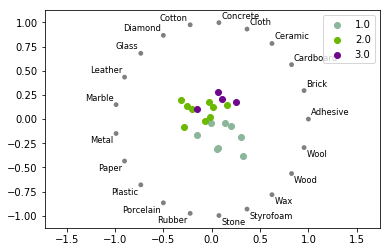

In [49]:
from pandas.tools.plotting import radviz
radviz(sim_data,"group")

In [50]:
material_nams=\
["Adhesive","Brick","Cardboard","Ceramic","Cloth","Concrete","Cotton","Diamond","Glass","Leather","Marble","Metal","Paper","Plastic","Porcelain","Rubber","Stone","Styrofoam","Wax","Wood","Wool"]

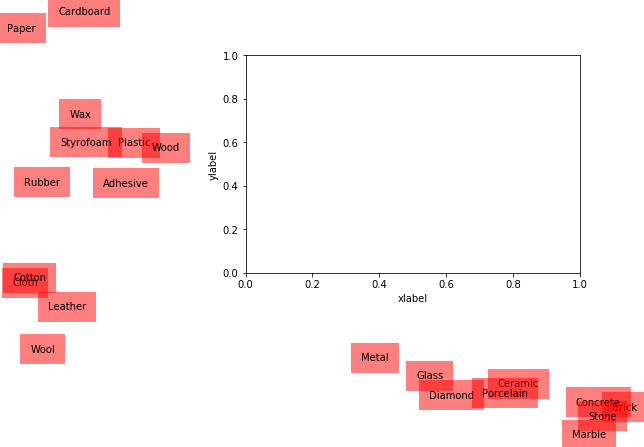

In [62]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
for i, m in enumerate(Weight_mat):
   
    ax.text(m[1], m[0], material_nams[i], ha='center', va='center',
           bbox=dict(facecolor='r', alpha=0.5, lw=0,pad=10))


#plt.show()





In [44]:
Weight_mat.shape

(21, 3)